<h1 style="text-align: center;">Employee Promotion Analysis</h1>

## Introduction:
  -> This project analyzes employee promotion patterns to understand which factors influence promotion decisions. Using EDA and visualizations, the analysis explores how performance, experience, and personal attributes relate to promotion outcomes.
### Aim:
  -> The aim of this project is to identify the major factors that impact employee promotions and determine how performance, experience, education, and other relevant attributes contribute to promotion outcomes.

## 1. Data Loading and Initial Overview
### ● Importing the dataset using Pandas to provide an overview:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [2]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
df.shape

(54808, 14)

In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## 2. Data Pre-processing
### ● Perform all necessary cleaning steps:

In [2]:
# categorical columns:
cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [3]:
# finding the missing values in categorical columns:
df[cat_cols].isnull().sum()

department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

In [4]:
# Using mode function filling the missing values:
df.fillna({'education': df['education'].mode()[0]},inplace=True)

In [5]:
df[cat_cols].isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

In [6]:
# numerical columns:
num_cols = df.select_dtypes(include=['integer','float']).columns

num_cols

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# finding the missing values in the numerical columns:
df[num_cols].isnull().sum()

employee_id                0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# Using mode function filling the missing values:
df.fillna({'previous_year_rating':df['previous_year_rating'].mode()[0]},inplace=True)

In [9]:
df[num_cols].isnull().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
# finding if there any duplication:
df.duplicated().sum()

np.int64(0)

In [11]:
# dropping region column :

df.drop('region',axis=1,inplace=True)
df.columns

Index(['employee_id', 'department', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [12]:
# changing column names to Propercase:
df.columns=df.columns.str.title()
df.columns

Index(['Employee_Id', 'Department', 'Education', 'Gender',
       'Recruitment_Channel', 'No_Of_Trainings', 'Age', 'Previous_Year_Rating',
       'Length_Of_Service', 'Kpis_Met >80%', 'Awards_Won?',
       'Avg_Training_Score', 'Is_Promoted'],
      dtype='object')

In [13]:
# changing gender column data to Uppercase: 
df['Gender'].str.upper()

0        F
1        M
2        M
3        M
4        M
        ..
54803    M
54804    F
54805    M
54806    M
54807    M
Name: Gender, Length: 54808, dtype: object

In [14]:
# changing recruitment channel column data to Propercase:
df['Recruitment_Channel'].str.title()

0        Sourcing
1           Other
2        Sourcing
3           Other
4           Other
           ...   
54803    Sourcing
54804       Other
54805       Other
54806    Sourcing
54807       Other
Name: Recruitment_Channel, Length: 54808, dtype: object

In [15]:
# renaming the column name:
df.rename(columns={'Awards_Won?': 'Awards_Won'}, inplace=True)
df.columns

Index(['Employee_Id', 'Department', 'Education', 'Gender',
       'Recruitment_Channel', 'No_Of_Trainings', 'Age', 'Previous_Year_Rating',
       'Length_Of_Service', 'Kpis_Met >80%', 'Awards_Won',
       'Avg_Training_Score', 'Is_Promoted'],
      dtype='object')

In [16]:
# Drived column:
## How Length of Service Influences Promotion:

df['Service_Promotion_Status'] = np.where((df['Length_Of_Service'] > 5) & (df['Is_Promoted'] == 1),
  'Promoted_Long service',np.where((df['Length_Of_Service'] > 5) & (df['Is_Promoted'] == 0),
  'Not Promoted_Long service',np.where((df['Length_Of_Service'] <= 5) & (df['Is_Promoted'] == 1), 
  'Promoted_Short service','Not Promoted_Short service')))

In [17]:
df['Service_Promotion_Status']

0         Not Promoted_Long service
1        Not Promoted_Short service
2         Not Promoted_Long service
3         Not Promoted_Long service
4        Not Promoted_Short service
                    ...            
54803     Not Promoted_Long service
54804     Not Promoted_Long service
54805    Not Promoted_Short service
54806    Not Promoted_Short service
54807    Not Promoted_Short service
Name: Service_Promotion_Status, Length: 54808, dtype: object

In [18]:
df.columns

Index(['Employee_Id', 'Department', 'Education', 'Gender',
       'Recruitment_Channel', 'No_Of_Trainings', 'Age', 'Previous_Year_Rating',
       'Length_Of_Service', 'Kpis_Met >80%', 'Awards_Won',
       'Avg_Training_Score', 'Is_Promoted', 'Service_Promotion_Status'],
      dtype='object')

In [19]:
df

,Employee_Id,Department,Education,Gender,Recruitment_Channel,No_Of_Trainings,Age,Previous_Year_Rating,Length_Of_Service,Kpis_Met >80%,Awards_Won,Avg_Training_Score,Is_Promoted,Service_Promotion_Status
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Not Promoted_Long service
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Not Promoted_Short service
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Not Promoted_Long service
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Not Promoted_Long service
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Not Promoted_Short service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0,Not Promoted_Long service
54804,74592,Operations,Master's & above,f,other,1,37,2.0,6,0,0,56,0,Not Promoted_Long service
54805,13918,Analytics,Bachelor's,m,other,1,27,5.0,3,1,0,79,0,Not Promoted_Short service
54806,13614,Sales & Marketing,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0,Not Promoted_Short service


In [19]:
# Filtering:
## employees who got promoted:
promoted=df[df['Is_Promoted']==1]
promoted

,Employee_Id,Department,Education,Gender,Recruitment_Channel,No_Of_Trainings,Age,Previous_Year_Rating,Length_Of_Service,Kpis_Met >80%,Awards_Won,Avg_Training_Score,Is_Promoted,Service_Promotion_Status
11,49017,Sales & Marketing,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1,Promoted_Short service
39,58304,Sales & Marketing,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1,Promoted_Long service
60,17673,Sales & Marketing,Master's & above,m,other,1,50,4.0,17,1,0,47,1,Promoted_Long service
66,77981,Finance,Bachelor's,m,other,1,27,3.0,1,1,1,58,1,Promoted_Short service
67,16502,Sales & Marketing,Bachelor's,m,sourcing,1,27,3.0,1,0,0,61,1,Promoted_Short service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,Bachelor's,m,sourcing,1,31,3.0,1,1,0,56,1,Promoted_Short service
54757,14502,Technology,Master's & above,m,other,1,54,4.0,7,0,0,81,1,Promoted_Long service
54761,8278,Procurement,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1,Promoted_Short service
54792,994,Sales & Marketing,Bachelor's,m,other,1,59,3.0,11,0,0,65,1,Promoted_Long service


In [20]:
## employees not promoted:
not_promoted=df[df['Is_Promoted']==0]
not_promoted

,Employee_Id,Department,Education,Gender,Recruitment_Channel,No_Of_Trainings,Age,Previous_Year_Rating,Length_Of_Service,Kpis_Met >80%,Awards_Won,Avg_Training_Score,Is_Promoted,Service_Promotion_Status
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Not Promoted_Long service
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Not Promoted_Short service
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Not Promoted_Long service
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Not Promoted_Long service
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Not Promoted_Short service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0,Not Promoted_Long service
54804,74592,Operations,Master's & above,f,other,1,37,2.0,6,0,0,56,0,Not Promoted_Long service
54805,13918,Analytics,Bachelor's,m,other,1,27,5.0,3,1,0,79,0,Not Promoted_Short service
54806,13614,Sales & Marketing,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0,Not Promoted_Short service


## 3. Exploratory Data Analysis (EDA) 
#### Univariate Analysis

##### i) Promotion Status Distribution:

In [21]:
df['Is_Promoted'].value_counts(normalize=True) * 100

Is_Promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

##### Result:
-> About 91.48% of employees were not promoted, while only 8.52% of employees were promoted.
##### Interpretation:
-> Only a small fraction of employees receive promotions, suggesting that the promotion process is selective.

##### ii) Distribution of number of trainings:

In [72]:
df['No_Of_Trainings'].value_counts(normalize=True) * 100

No_Of_Trainings
1     80.969931
2     14.572690
3      3.240403
4      0.853890
5      0.233543
6      0.080280
7      0.021895
8      0.009123
10     0.009123
9      0.009123
Name: proportion, dtype: float64

###### Result:
->Most employees attended only 1 training approximately 81%, followed by 2 trainings approximately 15%. Very few employees attended more than 3 trainings.
###### Interpretation:
-> The data shows that the majority of employees participate in minimal training activities, suggesting that either training opportunities are limited or most employees do not require frequent training.
 

##### iii) Department-wise employee distribution:

In [73]:
df['Department'].value_counts(normalize=True) * 100

Department
Sales & Marketing    30.725442
Operations           20.705007
Technology           13.023646
Procurement          13.023646
Analytics             9.764998
Finance               4.627062
HR                    4.411765
Legal                 1.895709
R&D                   1.822727
Name: proportion, dtype: float64

###### Result:
-> Most employees work in Sales & Marketing and Operations, then comes Technology and procurement, while Legal and R&D have the fewest.
###### Interpretation:
-> The company mainly focuses on sales and operations, with smaller teams in specialized areas.

##### iv) Education-wise Employee Distribution:

In [74]:
df['Education'].value_counts(normalize=True) * 100

Education
Bachelor's          71.299810
Master's & above    27.231426
Below Secondary      1.468764
Name: proportion, dtype: float64

###### Result:
-> Most employees hold a Bachelor’s degree, followed by those with a Master’s, while very few have qualifications below graduation.
###### Interpretation:
-> The workforce is mostly well-educated, showing that the organization values higher education for employment.

##### v) Employee Distribution by Recruitment Channel:

In [75]:
df['Recruitment_Channel'].value_counts(normalize=True) * 100

Recruitment_Channel
other       55.550285
sourcing    42.366078
referred     2.083637
Name: proportion, dtype: float64

###### Result:
-> Most employees were recruited via other channels and sourcing, while very few came through referrals.
###### Interpretation:
-> Recruitment is dominated by general or external channels, with direct sourcing also playing a key role.

##### vi) Gender Distribution of Employees:

In [76]:
df['Gender'].value_counts(normalize=True) * 100

Gender
m    70.237921
f    29.762079
Name: proportion, dtype: float64

###### Result:
-> Approximately 70.2% of employees are male and 29.8% are female.
###### Interpretation:
-> The workforce is male-dominated, with around two-thirds of employees being men and less than one-third women. This shows a gender imbalance in the organization.

##### vii) Employee Distribution by Length of Service:

In [77]:
df['Length_Of_Service'].value_counts(normalize=True) * 100

Length_Of_Service
3     12.832068
4     12.472632
2     12.195300
5     10.640782
7     10.128083
6      8.637425
1      8.296234
8      5.260181
9      4.796745
10     4.001241
11     1.671289
12     1.448694
13     1.253467
15     1.081959
14     1.001679
16     0.999854
17     0.788206
18     0.715224
19     0.600277
20     0.233543
21     0.142315
24     0.127719
23     0.118596
22     0.111298
25     0.093052
26     0.074807
27     0.065684
29     0.054737
28     0.054737
31     0.036491
30     0.021895
32     0.018246
33     0.016421
34     0.007298
37     0.001825
Name: proportion, dtype: float64

###### Result:
-> Most employees have 3–7 years of service, with the highest percentages at 3 years and 4 years. Very few employees have long tenures above 25 years.
###### Interpretation:
-> Most employees have a moderate length of service, with few long-term staff. This suggests the company has a mix of new and experienced employees.

##### viii) Age Distribution of Employees:

In [78]:
df['Age'].value_counts(normalize=True) * 100

Age
30    6.686980
32    6.447964
31    6.447964
29    6.212597
33    5.856809
28    5.741863
34    5.612319
27    5.158006
35    4.946358
36    4.592395
37    3.950153
26    3.758575
38    3.508612
39    3.092614
40    3.034229
25    2.370092
41    2.351846
42    2.096409
43    1.809955
44    1.545395
24    1.541746
45    1.386659
46    1.271712
48    1.016275
47    1.016275
50    0.950591
49    0.804627
23    0.780908
51    0.709750
53    0.664137
52    0.640417
54    0.571085
55    0.536418
56    0.481682
57    0.434243
22    0.421471
60    0.395928
58    0.388629
59    0.381331
20    0.206174
21    0.178806
Name: proportion, dtype: float64

###### Result:
-> Most employees are aged between 28 and 36 years, with the highest percentages at 30 years (6.69%), 31 years (6.45%), and 32 years (6.45%). Very few employees are below 22 or above 55 years.
###### Interpretation:
-> Most employees are in their 20s and 30s, showing a young workforce.

#### Bivariate Analysis:
##### i) Promotion rate by department:

In [79]:
df.groupby('Department')['Is_Promoted'].mean().sort_values(ascending=False)

Department
Technology           0.107593
Procurement          0.096386
Analytics            0.095665
Operations           0.090148
Finance              0.081230
Sales & Marketing    0.072031
R&D                  0.069069
HR                   0.056245
Legal                0.051011
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees in Technology (10.8%), Procurement (9.6%), and Analytics (9.6%) have the highest promotion rates, while Legal (5.1%) and HR (5.6%) have the lowest.
###### Interpretation:
-> This suggests that technical and analytical roles offer better promotion opportunities compared to support functions.

##### ii) Promotion rate by education:

In [80]:
df.groupby('Education')['Is_Promoted'].mean().sort_values(ascending=False)

Education
Master's & above    0.098559
Below Secondary     0.083230
Bachelor's          0.080096
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees with a Master’s degree or higher have the highest promotion rate, followed by those with education below secondary and Bachelor’s degree.
###### Interpretation:
-> Higher education appears to slightly increase promotion chances, but the difference is not very large, suggesting that performance factors may matter more than education level for promotions.

##### iii) Promotion rate by recruitment channel:

In [81]:
df.groupby('Recruitment_Channel')['Is_Promoted'].mean().sort_values(ascending=False)

Recruitment_Channel
referred    0.120841
sourcing    0.085013
other       0.083952
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees recruited through referrals have the highest promotion rate (12.08%), compared to those hired via sourcing (8.50%) or other channels (8.39%).
###### Interpretation:
->Referral-based hiring appears to bring in candidates who perform better and are more likely to get promoted.

##### iv) Promotion rate by KPIs met:

In [82]:
df.groupby('Kpis_Met >80%')['Is_Promoted'].mean().sort_values(ascending=False)

Kpis_Met >80%
1    0.169094
0    0.039587
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees who met more than 80% of their KPIs have a promotion rate of 16.91%, while those who did not meet the target have only a 3.96% promotion rate. 
###### Interpretation:
->Consistently meeting performance targets is a major factor driving promotions.

##### v) Promotion rate by Gender:

In [83]:
df.groupby('Gender')['Is_Promoted'].mean().sort_values(ascending=False)

Gender
f    0.089934
m    0.083151
Name: Is_Promoted, dtype: float64

###### Result:
-> Female employees have a slightly higher promotion rate (8.99%) compared to male employees (8.32%).
###### Interpretation:
->Gender does not show a major disparity in promotions, though females appear to have a modest edge.

##### vi) Previous Year Rating vs Promotion Rate:

In [84]:
df.groupby('Previous_Year_Rating')['Is_Promoted'].mean().sort_values(ascending=False)

Previous_Year_Rating
5.0    0.163615
4.0    0.079376
3.0    0.074488
2.0    0.042840
1.0    0.014141
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees with a previous year rating of 5 have the highest promotion rate (16.36%), while those with a rating of 1 have the lowest (1.41%). 
###### Interpretation:
-> Promotion likelihood clearly increases with better performance ratings. Strong past performance is a key determinant of promotion.

##### vii) Promotion rate by length of service:

In [85]:
df.groupby('Length_Of_Service')['Is_Promoted'].mean().sort_values(ascending=False)

Length_Of_Service
34    0.250000
32    0.200000
23    0.107692
11    0.104803
29    0.100000
22    0.098361
19    0.097264
8     0.093306
10    0.093023
2     0.089019
4     0.087478
9     0.087105
3     0.086592
6     0.084706
7     0.083589
1     0.082912
5     0.081447
12    0.079345
13    0.078603
20    0.078125
16    0.074818
15    0.072513
28    0.066667
18    0.063776
17    0.060185
14    0.052823
21    0.051282
25    0.039216
27    0.027778
26    0.000000
24    0.000000
31    0.000000
30    0.000000
33    0.000000
37    0.000000
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees with a longer length of service (30+ years) show higher but irregular promotion rates, peaking at 25% for 34 years of service. However, beyond a certain point, the promotion rate tends to decline or become inconsistent. Moderate experience (around 8–20 years) generally supports promotions, while extremely long service does not necessarily guarantee higher promotion chances.
###### Interpretation:
->Promotion rates are steadier for moderate service years, while very long service shows irregular and inconsistent promotion chances.

##### viii) Promotion rate by Number of training attended:

In [86]:
df.groupby('No_Of_Trainings')['Is_Promoted'].mean().sort_values(ascending=False)

No_Of_Trainings
1     0.088107
2     0.075748
3     0.068694
4     0.055556
6     0.045455
5     0.023438
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: Is_Promoted, dtype: float64

###### Result:
-> Employees who attended fewer trainings (especially 1 training) have the highest promotion rate (8.81%), while those attending more trainings show a declining promotion rate, with no promotions beyond 6 trainings.
###### Interpretation:
->Frequent trainings may be associated with lower performers or those needing improvement, while high performers tend to need fewer trainings for promotion.

##### ix) Promotion rate by average training score:

In [87]:
pd.pivot_table(df, values='Is_Promoted', index='Avg_Training_Score', aggfunc='mean')

,Is_Promoted
Avg_Training_Score,
39,0.000000
40,0.000000
41,0.038462
42,0.032258
43,0.039773
...,...
95,1.000000
96,0.979167
97,1.000000


###### Result:
-> Employees with lower training scores (below 45) have very low promotion rates (around 0–4%).
The promotion rate gradually increases with training scores in the mid-range.Those scoring 95 and above have an almost 100% promotion rate. 
###### Interpretation:
->As the average training score increases, the promotion rate rises sharply. Employees who achieve high training scores are far more likely to be promoted, showing that training effectiveness and skill mastery play a key role in advancement.

##### x) Promotion rate by previous year rating and department:

In [88]:
pd.pivot_table(df, values='Is_Promoted', index='Previous_Year_Rating', columns='Department', aggfunc='mean')

Department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
Previous_Year_Rating,,,,,,,,,
1.0,0.027363,0.029412,0.000000,0.011111,0.019943,0.016224,0.000000,0.008721,0.022700
2.0,0.069686,0.080645,0.024390,0.066667,0.056886,0.053356,0.000000,0.024879,0.051005
3.0,0.081974,0.069224,0.048758,0.041016,0.083682,0.071558,0.064073,0.072796,0.080615
4.0,0.069815,0.047817,0.044706,0.031056,0.055690,0.071309,0.062500,0.112985,0.102012
5.0,0.159859,0.151246,0.105634,0.101852,0.147905,0.235636,0.112782,0.123858,0.318795


###### Result:
-> Promotion rates increase consistently with higher performance ratings across all departments.
Employees with a rating of 5 have the highest promotion rates in every department.
Among them, the Technology (31.88%) and Procurement (23.56%) departments show the highest promotion rates for top-rated employees. Departments like HR and Legal generally show lower promotion rates across all ratings. 
###### Interpretation:
-> High performance strongly drives promotions, especially in Technology and Procurement, though the effect differs across departments.

#### Multivariate:

##### Correlation of Numerical Features with Promotion Status:

In [89]:
corr = df.corr(numeric_only=True)['Is_Promoted'].sort_values(ascending=False)
print("Correlation of Numerical Features with Promotion Status:\n",corr)

Correlation of Numerical Features with Promotion Status:
 Is_Promoted             1.000000
Kpis_Met >80%           0.221582
Awards_Won              0.195871
Avg_Training_Score      0.181147
Previous_Year_Rating    0.153230
Employee_Id             0.001206
Length_Of_Service      -0.010670
Age                    -0.017166
No_Of_Trainings        -0.024896
Name: Is_Promoted, dtype: float64


###### Result:
-> Performance factors—KPIs met, awards won, training score, and previous rating—show the strongest positive correlation with promotion. Age, length of service, and number of trainings show almost no correlation.
###### Interpretation:
-> Promotions are mainly influenced by performance, while experience, age, or attending more trainings have little impact.

## 4.Visualization

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

### i) Univariate

#### Age Distribution of Employees Using Histogram:
-> The histogram below shows the age distribution of employees.
It helps identify the most common age groups and understand the overall age spread within the organization.

<function matplotlib.pyplot.show(close=None, block=None)>

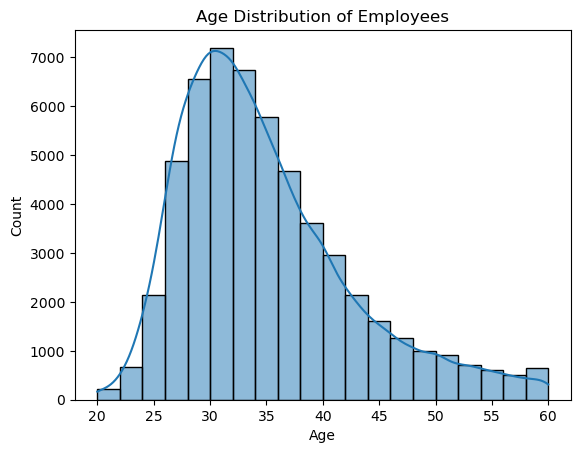

In [96]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.show

##### Interpretation:
-> Most of the employees are aged 25-40 years

#### Education Level Distribution Using Count Plot:
-> The chart below shows the distribution of employees across different education levels.
It helps understand which education category has the highest number of employees in the organization.

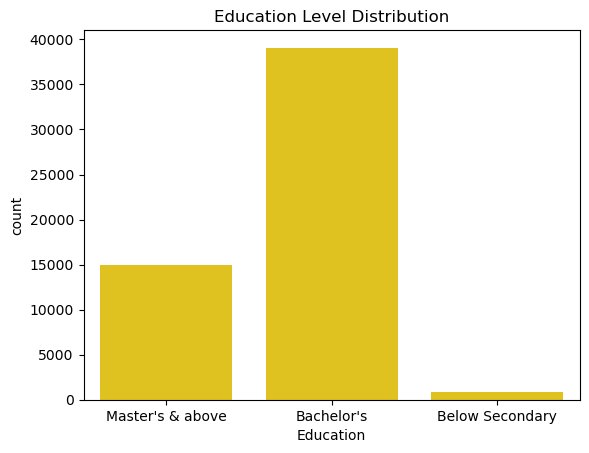

In [95]:

sns.countplot(x='Education', color='gold',data=df)
plt.title('Education Level Distribution')
plt.show()


##### Interpretation:
-> Majority have Bachelor’s degrees, followed by Master’s.

#### Promotion Status Distribution Using Count Plot:
-> The chart below shows the distribution of employees based on their promotion status.
It helps identify the proportion of employees who were promoted versus those who were not.

Text(0.5, 1.0, 'Promotion Status Distribution')

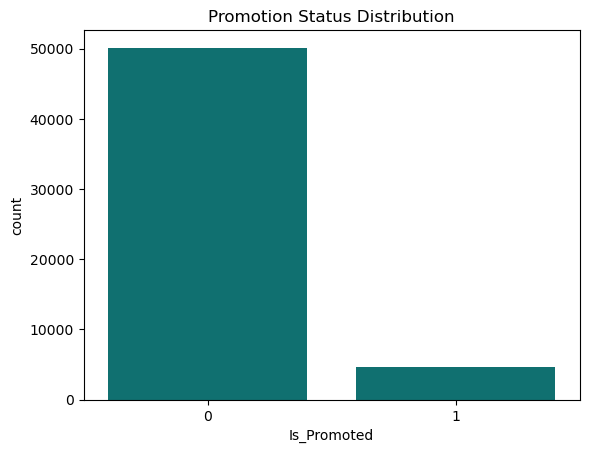

In [42]:
sns.countplot(x='Is_Promoted', color='teal', data=df)
plt.title('Promotion Status Distribution')
plt.show()

##### Interpretation:
-> Only a small percentage of employees got promoted.

#### Gender Distribution Of Employees Using Histogram:
-> The histogram below shows the gender distribution of employees in the organization.
It helps understand the overall gender balance within the workforce.

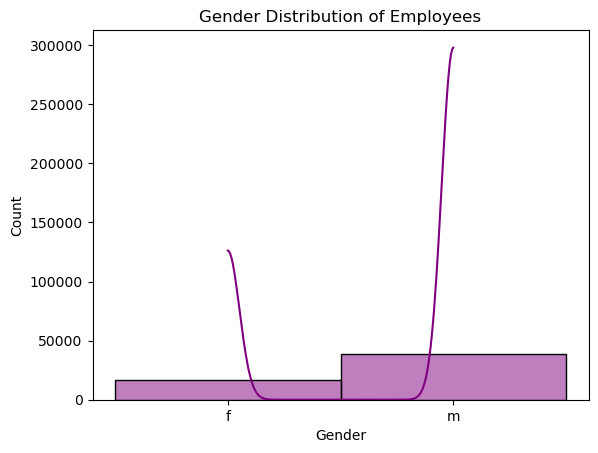

In [94]:
sns.histplot(df['Gender'], bins=20, color='purple',kde=True)
plt.title('Gender Distribution of Employees')
plt.show()

##### Interpretation:
-> The graph indicates that the number of male employees is substantially higher than the number of female employees.

### ii) Bivariate

#### Previous year rating vs Promotion Using Box plot:
-> The box plot below compares previous year ratings of promoted and non-promoted employees.
It helps show whether higher past performance ratings lead to a greater chance of promotion.


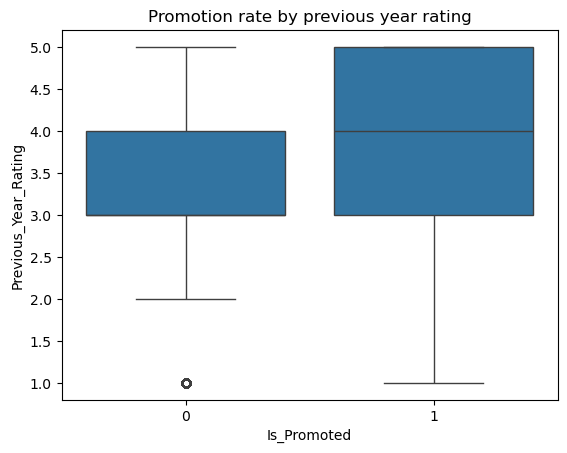

In [93]:
sns.boxplot(x='Is_Promoted', y='Previous_Year_Rating', data=df)
plt.title('Promotion rate by previous year rating')
plt.show()

##### Interpretation:
->Employees with higher rating are more likely to be promoted

#### Number of Trainings vs Promotion Using Bar Plot:
-> The chart below shows how promotion rates vary with the number of trainings attended.
It helps understand whether taking more trainings increases the chances of getting promoted.

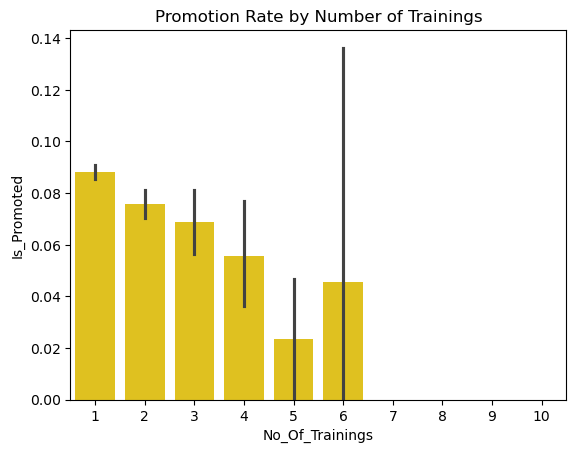

In [44]:
sns.barplot(x='No_Of_Trainings', y='Is_Promoted', data=df, estimator='mean',color='gold')
plt.title('Promotion Rate by Number of Trainings')
plt.show()

##### Interpretation:
-> Promotion likelihood peaks among employees with one training, while those with many trainings show lower promotion rates. Frequent training may be linked to skill gaps rather than higher competence.

#### Impact of Length of Service on Promotion (Line Plot):
-> The line chart below shows how promotion rates change with the length of service.
It helps identify whether employees with more years in the company are more likely to be promoted.

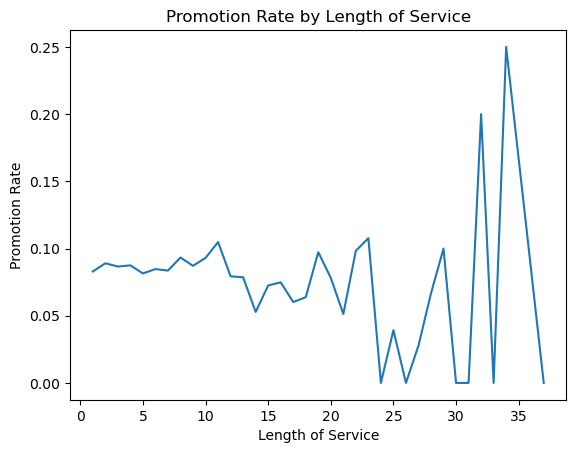

In [29]:
los_rate = df.groupby('Length_Of_Service')['Is_Promoted'].mean()

plt.plot(los_rate.index, los_rate.values)
plt.title('Promotion Rate by Length of Service')
plt.xlabel('Length of Service')
plt.ylabel('Promotion Rate')
plt.show()

##### Interpretation:
-> Here the trend appears to be that the promotion rate is highest for employees with a shorter length of service and generally decreases as the length of service increases. Towards the right side (around 30-35 years of service), there is a sudden spikes in promotion rate. These spikes represent a small number of employees with long service durations- their promotions cause the rate to jumb temporarily. Promotions appear to be performance based rather than seniority-based.

#### Age vs Promotion(Box Plot):
-> The box plot below compares the age distribution of promoted and non-promoted employees.
It helps determine whether age has any noticeable impact on promotion decisions.

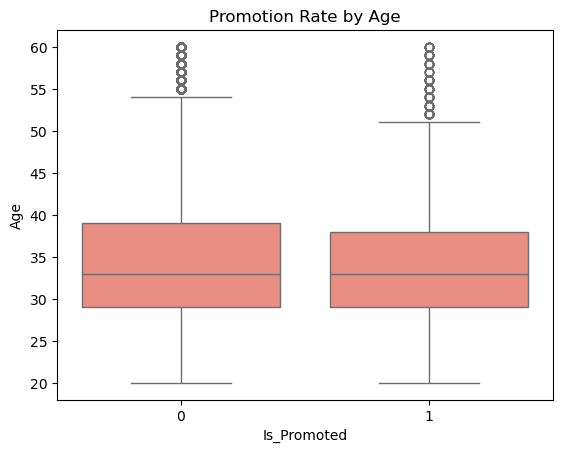

In [50]:
sns.boxplot(x='Is_Promoted', y='Age', data=df, color='salmon')
plt.title('Promotion Rate by Age')
plt.show()


##### Interpretation:
-> promotions appears to be evenly distributed across age groups, indicating that age is not a major factor in determining promotion in this dataset. The median age of employees who got promoted and those who did not is almost similar around 30-40 years. Age does not have a strong influence on promotion.There are few older employees around 50-55 years who were not promoted, shown as outliers.

#### Department vs Promotion(Bar Plot):
-> The chart below shows the average promotion rate across different departments.
It helps identify which departments have more employees getting promoted compared to others.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

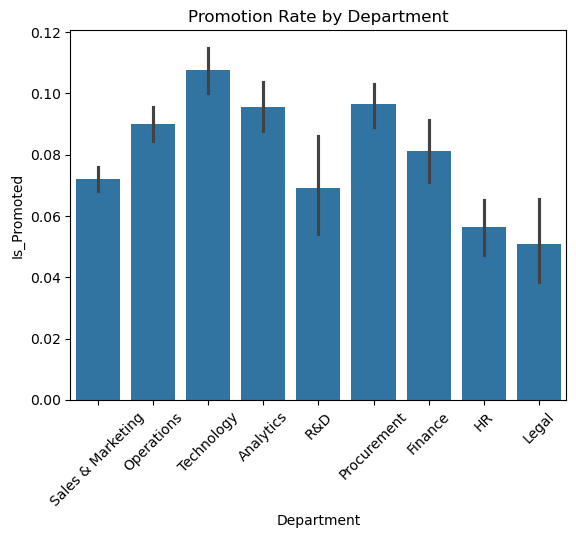

In [47]:
sns.barplot(x='Department', y='Is_Promoted', data=df)
plt.title('Promotion Rate by Department')
plt.xticks(rotation=45)

##### Interpretation:
-> Indicates that employees in the technological ,procurement and analytical roles experience higher chances of promotion compared to those in administrative or support functions.

#### Education vs Promotion(Bar Plot):
-> The chart below shows how promotion rates vary by education level.
It helps understand whether higher education leads to better chances of promotion.


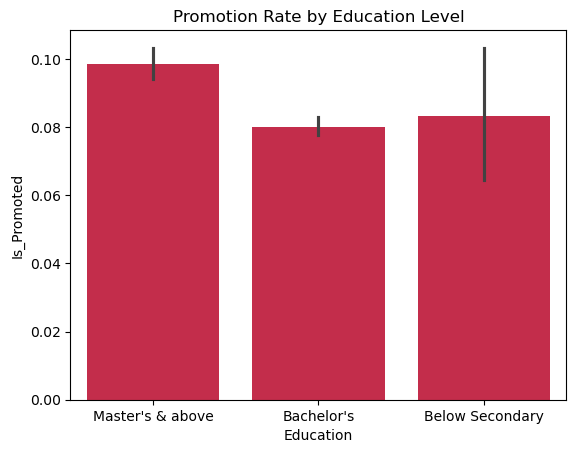

In [56]:
sns.barplot(x='Education', y='Is_Promoted', data=df, estimator='mean',color='crimson')
plt.title('Promotion Rate by Education Level')
plt.show()


##### Interpretation:
-> The likelihood of promotion increases with higher education levels. Employees with postgraduate qualifications are more frequently promoted compared to those with only a Bachelors or lower education level.

#### Recruitment Channel vs Promotion(Bar Plot):
-> The chart below compares promotion rates across different recruitment channels.
It helps identify which hiring source has a higher proportion of promoted employees.

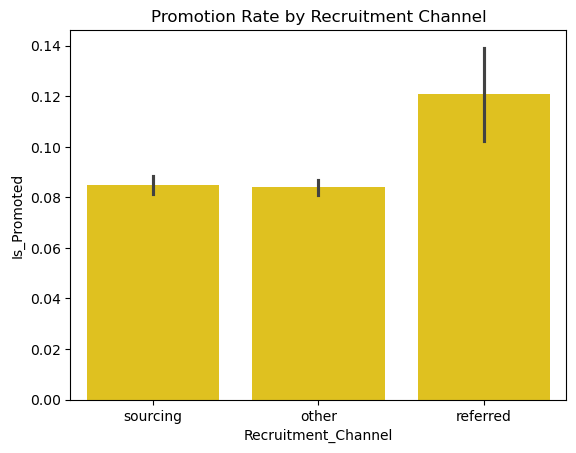

In [59]:
sns.barplot(x='Recruitment_Channel', y='Is_Promoted', data=df,color='gold', estimator='mean')
plt.title('Promotion Rate by Recruitment Channel')
plt.show()


##### Interpretation:

-> Employees hired through referrals tend to get promoted more often than hired through other recruitment channels. This could indicate that referral candidates are either better suited for the organization or receive more support and opportunities after joining.

### iii) Multivariate:
#### Scatter Plot Showing Promotion Trend by Age and Previous Year Rating:
-> This chart explores how an employee’s age and previous year rating relate to their promotion status.

Text(0.5, 1.0, 'Age vs Rating Colored by Promotion')

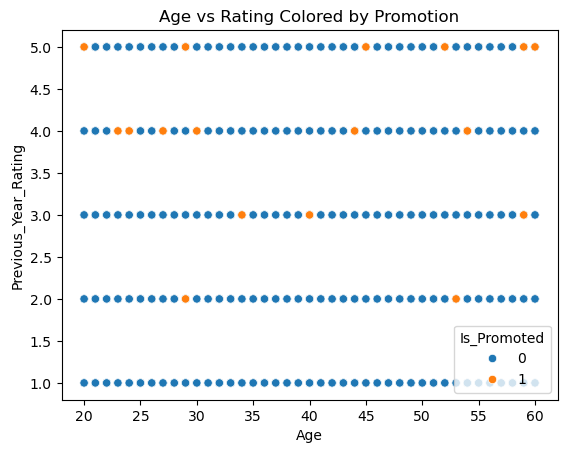

In [52]:
sns.scatterplot(x='Age', y='Previous_Year_Rating', hue='Is_Promoted', data=df)
plt.title('Age vs Rating Colored by Promotion')
plt.show()

##### Interpretation:
-> promoted individuals are primarily found in the higher rating range, generally above a rating of 3.5.This suggest that a high previous years rating is a strong indicator for promotion. The promoted individuals are observed across all age groups from approximately 25 to 60.  This implies that Promotion is not limited to a specific age group, but it may be more common among more experienced employees.

#### Correlation of Numerical Features with Promotion status:
-> This image shows a correlation heatmap that displays how strongly each numerical feature in the dataset is related to Is_Promoted.

Text(0.5, 1.0, 'Correlation With Is Promoted')

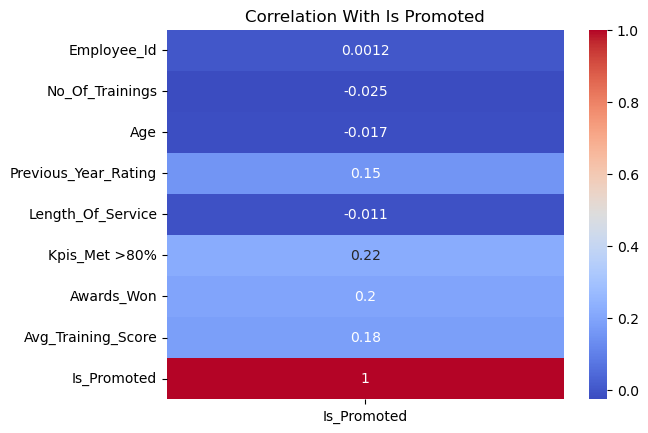

In [91]:
corr = df.corr(numeric_only=True)[['Is_Promoted']]

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation With Is Promoted')
plt.show()

##### Interpretation:
i) KPIs Met >80% (0.22 correlation):Strongest positive relationship. Employees who met KPIs have higher chances of promotion. This is the biggest driver among numerical variables.

ii) Awards Won (0.20 correlation): Employees who received awards are more likely to be promoted. This shows recognition and outstanding performance matters a lot.

iii) Previous Year Rating(0.15 correlation): Higher annual performance ratings increase the probability of promotion.

iv) Average training score(0.11 correlation): Better training performance slightly improves promotion chances.

v) No significant correlation for: Age(-0.017),Length of Service(-0.011), No.of Trainings(-0.025). These values are close to zero, meaning they do not influence promotions much.

## Findings:
1. Employees with higher previous-year ratings and consistently meeting KPIs had a significantly higher promotion rate compared to others.
2. Experience contributed to promotions, but only up to a point.
3. Although employees who completed more trainings tend to have lower promotion chances, this effect is weaker compared to performance ratings or KPI achievement.
4. Award-winning employees were far more likely to be promoted.
5. Employees with Master’s degrees or higher had better promotion rates, but many Bachelor’s degree holders were also promoted based on performance.
6. Certain departments (like Technology, Analytics, or Procurement) showed higher promotion rates, possibly due to more growth opportunities.

## Suggestions:
1. Provide useful and job-specific training to help employees improve.
2. Give extra guidance or development plans to departments that have fewer promotions.
3. Increase recognition for good work.
4. Reward employees who perform well to keep them motivated.
5. Explain what factors the company considers for promotions to avoid confusion.
6. Check if experienced employees are being overlooked and help them grow.
7. Regularly review promotion data to ensure decisions are fair and unbiased.

## Conclusion:
->The analysis shows that performance is the main factor influencing promotions, with high ratings, KPI achievements, and awards leading to better chances of advancement. Experience and education contribute to promotion outcomes but play a smaller role compared to performance. Overall, the analysis shows that employees who consistently perform well are more likely to be promoted, highlighting the company’s focus on measurable results and on-the-job excellence.